In [290]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Libraries

In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

In [292]:
df=pd.read_csv('/content/drive/MyDrive/dmml project/shopping_trends.csv',index_col='Customer ID')
df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [293]:
df.shape

(3900, 18)

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3900 entries, 1 to 3900
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3900 non-null   int64  
 1   Gender                    3900 non-null   object 
 2   Item Purchased            3900 non-null   object 
 3   Category                  3900 non-null   object 
 4   Purchase Amount (USD)     3900 non-null   int64  
 5   Location                  3900 non-null   object 
 6   Size                      3900 non-null   object 
 7   Color                     3900 non-null   object 
 8   Season                    3900 non-null   object 
 9   Review Rating             3900 non-null   float64
 10  Subscription Status       3900 non-null   object 
 11  Payment Method            3900 non-null   object 
 12  Shipping Type             3900 non-null   object 
 13  Discount Applied          3900 non-null   object 
 14  Promo Code Us

In [295]:
df.columns

Index(['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Preferred Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [296]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['Age', 'Gender', 'Item_Purchased', 'Category', 'Purchase_Amount_(USD)',
       'Location', 'Size', 'Color', 'Season', 'Review_Rating',
       'Subscription_Status', 'Payment_Method', 'Shipping_Type',
       'Discount_Applied', 'Promo_Code_Used', 'Previous_Purchases',
       'Preferred_Payment_Method', 'Frequency_of_Purchases'],
      dtype='object')

Handling missing values

In [297]:
df.isnull().sum()

,0
Age,0
Gender,0
Item_Purchased,0
Category,0
Purchase_Amount_(USD),0
Location,0
Size,0
Color,0
Season,0
Review_Rating,0


Statiscal Measures

In [298]:
df.describe()


,Age,Purchase_Amount_(USD),Review_Rating,Previous_Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


Data Visualization

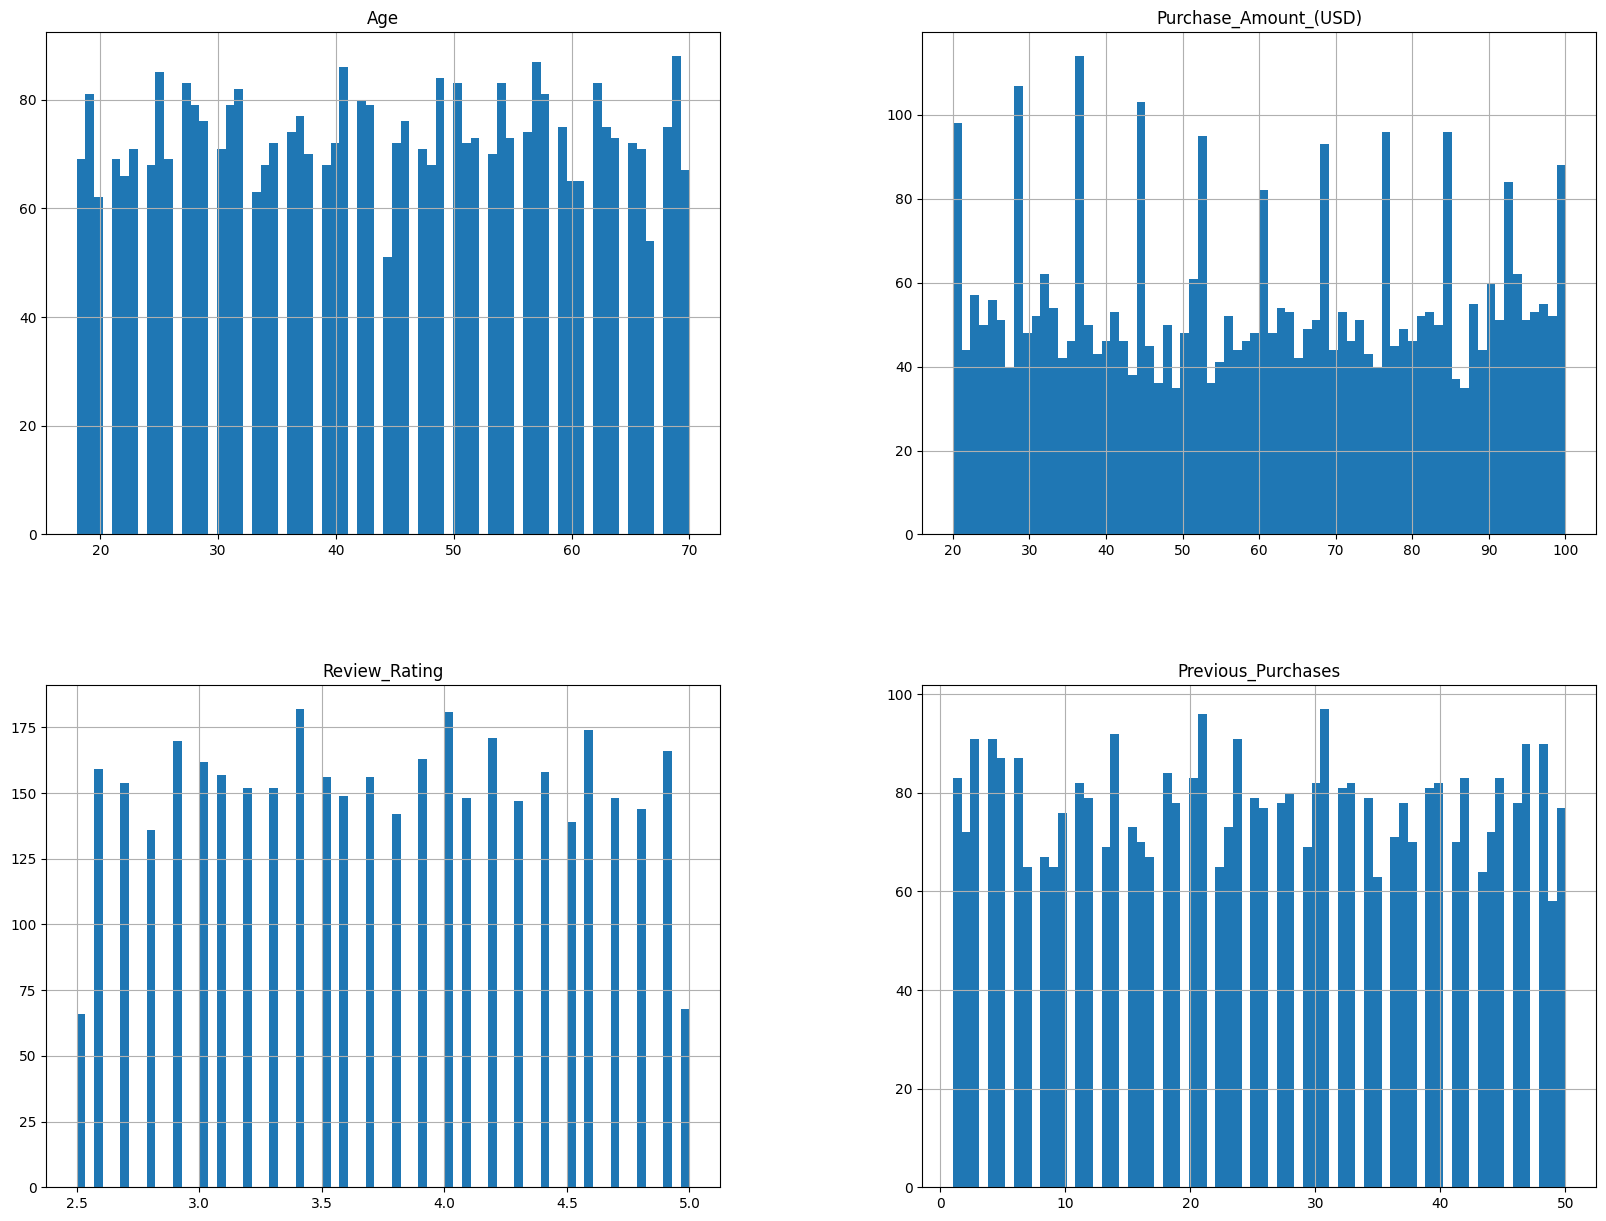

In [299]:
# Visualize distributions
df.hist(bins=70, figsize=(20,15))
plt.show()


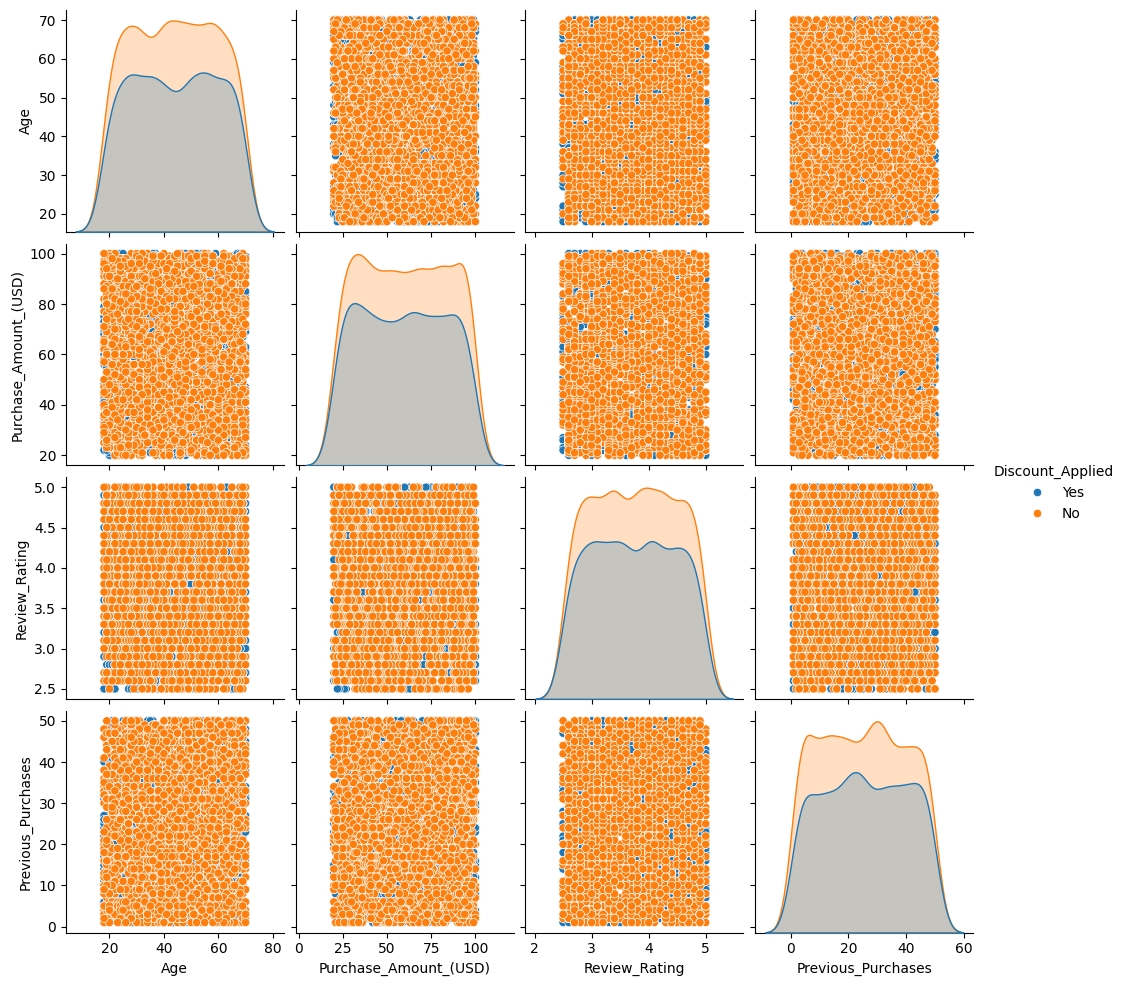

In [300]:
sns.pairplot(data=df, hue='Discount_Applied' )

<Axes: xlabel='Gender', ylabel='count'>

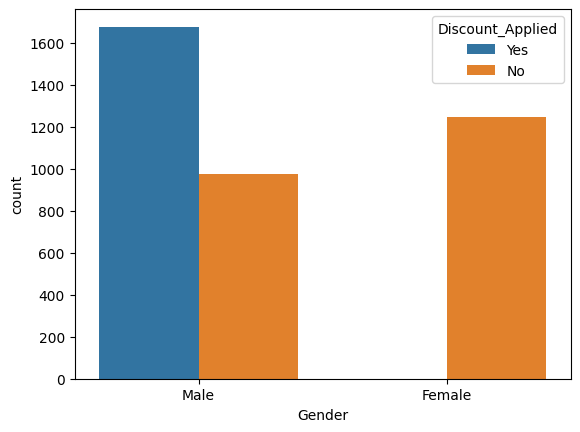

In [301]:
sns.countplot(x='Gender', hue='Discount_Applied', data=df)

<Axes: xlabel='Season', ylabel='count'>

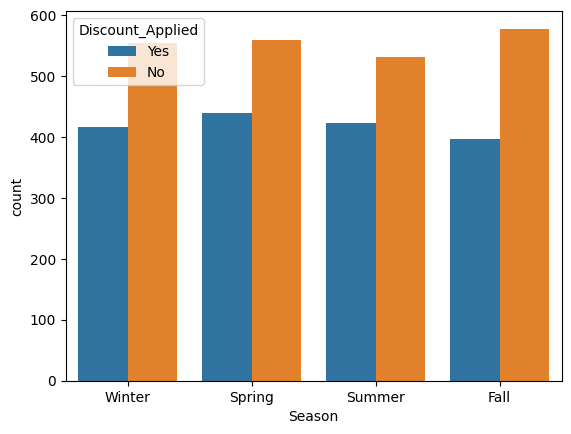

In [302]:
sns.countplot(x='Season', hue='Discount_Applied', data=df)

<Axes: xlabel='Subscription_Status', ylabel='count'>

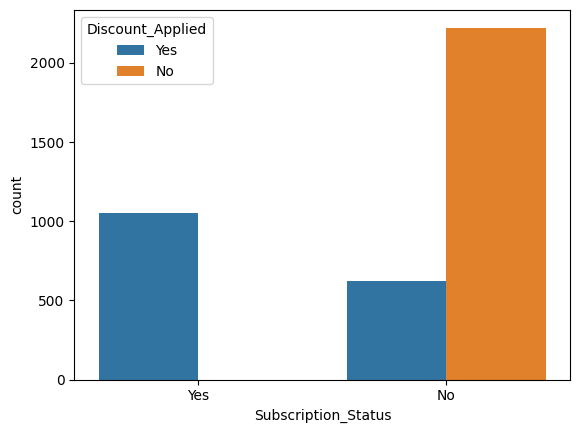

In [303]:
sns.countplot(x='Subscription_Status', hue='Discount_Applied', data=df)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Fortnightly'),
  Text(1, 0, 'Weekly'),
  Text(2, 0, 'Annually'),
  Text(3, 0, 'Quarterly'),
  Text(4, 0, 'Bi-Weekly'),
  Text(5, 0, 'Monthly'),
  Text(6, 0, 'Every 3 Months')])

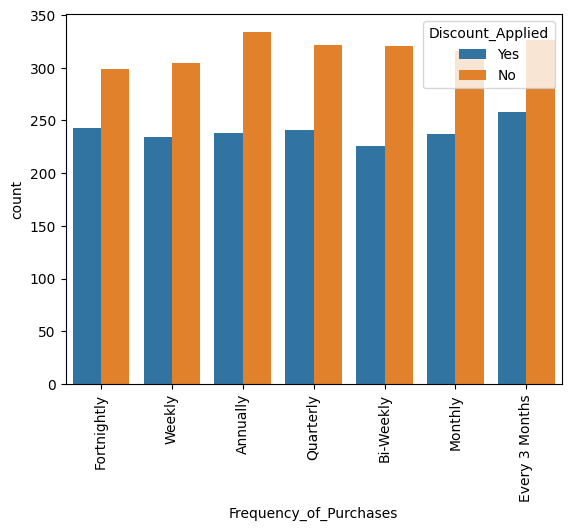

In [304]:
sns.countplot(x='Frequency_of_Purchases', hue='Discount_Applied', data=df)
plt.xticks(rotation=90)

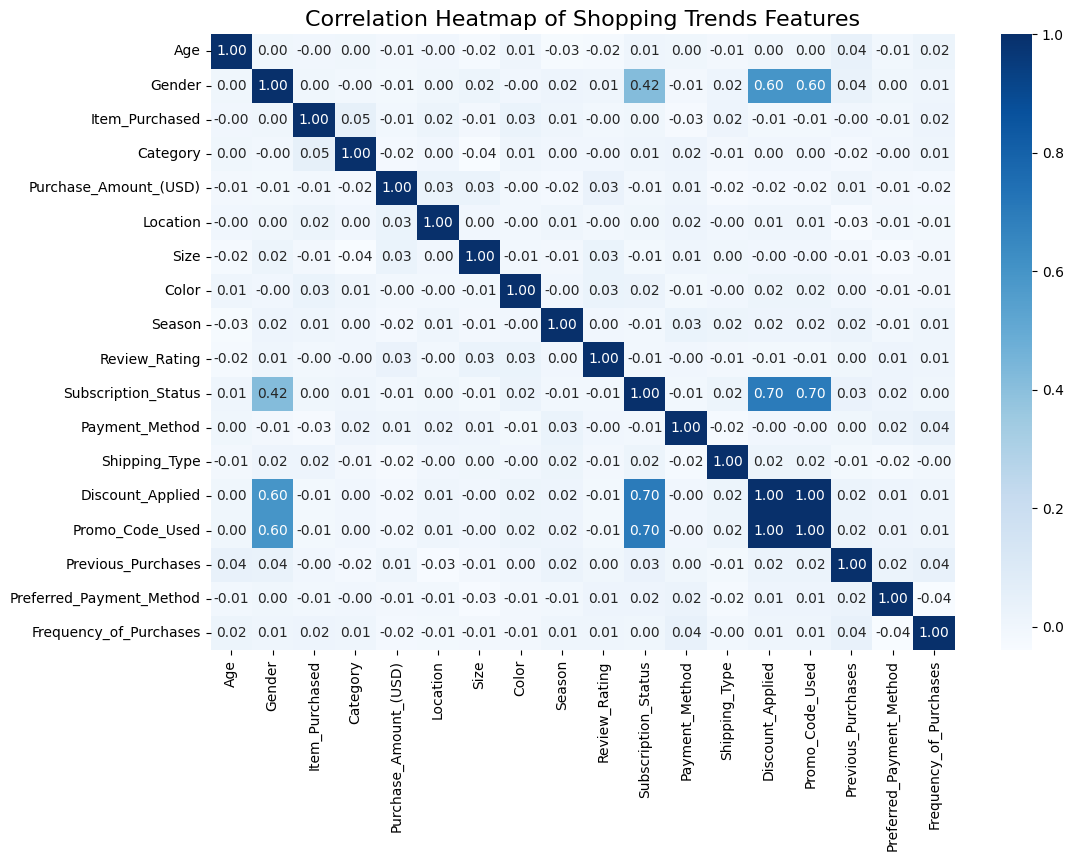

In [305]:
# Encode categorical variables
encoded_df = df.copy()
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(df[col])

correlation_matrix = encoded_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', cbar=True, fmt='.2f')
plt.title("Correlation Heatmap of Shopping Trends Features", fontsize=16)
plt.xticks(rotation=90)
plt.show()


Label Encoding

In [306]:
pd.set_option('future.no_silent_downcasting', True)
df['Discount_Applied'].value_counts()
df.replace({'Discount_Applied':{'No':0, 'Yes':1}},inplace=True)
df.head()

,Age,Gender,Item_Purchased,Category,Purchase_Amount_(USD),Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
Customer ID,,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,1,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,1,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,1,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,1,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,1,Yes,31,PayPal,Annually


In [307]:
pd.set_option('future.no_silent_downcasting', True)
df.replace({'Gender':{'Male':1, 'Female':0}, 'Season':{'Winter':0,'Spring':1, 'Summer':2,'Fall':3},
            'Subscription_Status':{'No':0,'Yes':1},
            'Frequency_of_Purchases':{'Every 3 Months':	0,'Annually':	1,'Quarterly': 2,'Monthly': 3,'Bi-Weekly': 4,'Fortnightly': 5,'Weekly': 6}}, inplace=True)
df.head()

,Age,Gender,Item_Purchased,Category,Purchase_Amount_(USD),Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
Customer ID,,,,,,,,,,,,,,,,,,
1,55,1,Blouse,Clothing,53,Kentucky,L,Gray,0,3.1,1,Credit Card,Express,1,Yes,14,Venmo,5
2,19,1,Sweater,Clothing,64,Maine,L,Maroon,0,3.1,1,Bank Transfer,Express,1,Yes,2,Cash,5
3,50,1,Jeans,Clothing,73,Massachusetts,S,Maroon,1,3.1,1,Cash,Free Shipping,1,Yes,23,Credit Card,6
4,21,1,Sandals,Footwear,90,Rhode Island,M,Maroon,1,3.5,1,PayPal,Next Day Air,1,Yes,49,PayPal,6
5,45,1,Blouse,Clothing,49,Oregon,M,Turquoise,1,2.7,1,Cash,Free Shipping,1,Yes,31,PayPal,1


In [308]:
#Separating the data and label
X = df[['Age', 'Gender', 'Purchase_Amount_(USD)', 'Review_Rating', 'Season', 'Subscription_Status', 'Previous_Purchases', 'Frequency_of_Purchases']]
Y=df['Discount_Applied']
print(X)
print(Y)

             Age Gender  Purchase_Amount_(USD)  Review_Rating Season  \
Customer ID                                                            
1             55      1                     53            3.1      0   
2             19      1                     64            3.1      0   
3             50      1                     73            3.1      1   
4             21      1                     90            3.5      1   
5             45      1                     49            2.7      1   
...          ...    ...                    ...            ...    ...   
3896          40      0                     28            4.2      2   
3897          52      0                     49            4.5      1   
3898          46      0                     33            2.9      1   
3899          44      0                     77            3.8      2   
3900          52      0                     81            3.1      1   

            Subscription_Status  Previous_Purchases Frequency_o

Data Preparation

In [309]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(3900, 8) (3510, 8) (390, 8)


In [310]:
# Create a preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Transform the data
X_train_prepared = preprocessing_pipeline.fit_transform(X_train)
X_test_prepared = preprocessing_pipeline.transform(X_test)

In [311]:
X_train_prepared

array([[ 1.58052809,  0.68186624,  1.35455475, ..., -0.60785597,
         0.11589796, -0.96170222],
       [-1.70619126, -1.4665633 , -0.12476368, ..., -0.60785597,
        -0.92274502,  1.03804588],
       [-1.44325371,  0.68186624, -0.42062737, ...,  1.64512656,
         0.46211229, -0.4617652 ],
       ...,
       [-0.72017546,  0.68186624, -0.08249744, ..., -0.60785597,
        -0.85350216, -1.46163925],
       [ 0.59451228,  0.68186624,  1.52361972, ..., -0.60785597,
        -1.13047362, -0.96170222],
       [ 0.79171544, -1.4665633 , -0.9700885 , ..., -0.60785597,
         0.80832661,  0.03817183]])

Model Selection and Traning

In [312]:
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

# Initialize models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

k = 5

# Random Forest
rf_scores = cross_val_score(rf_model, X_train_prepared, Y_train, cv=k, scoring='accuracy')
print(f"Random Forest {k}-Fold Cross-Validation Accuracy Scores: {rf_scores}")
print(f"Mean Accuracy: {rf_scores.mean():.4f}")

# k-Nearest Neighbors
knn_scores = cross_val_score(knn_model, X_train_prepared, Y_train, cv=k, scoring='accuracy')
print(f"KNN {k}-Fold Cross-Validation Accuracy Scores: {knn_scores}")
print(f"Mean Accuracy: {knn_scores.mean():.4f}")

# Logistic Regression
lr_scores = cross_val_score(lr_model, X_train_prepared, Y_train, cv=k, scoring='accuracy')
print(f"Logistic Regression {k}-Fold Cross-Validation Accuracy Scores: {lr_scores}")
print(f"Mean Accuracy: {lr_scores.mean():.4f}")

# Decision Tree
dt_scores = cross_val_score(dt_model, X_train_prepared, Y_train, cv=k, scoring='accuracy')
print(f"Decision Tree {k}-Fold Cross-Validation Accuracy Scores: {dt_scores}")
print(f"Mean Accuracy: {dt_scores.mean():.4f}")

Random Forest 5-Fold Cross-Validation Accuracy Scores: [0.81623932 0.81908832 0.84330484 0.81481481 0.82051282]
Mean Accuracy: 0.8228
KNN 5-Fold Cross-Validation Accuracy Scores: [0.7962963  0.81908832 0.84330484 0.80769231 0.82051282]
Mean Accuracy: 0.8174
Logistic Regression 5-Fold Cross-Validation Accuracy Scores: [0.83903134 0.84330484 0.85327635 0.81196581 0.84615385]
Mean Accuracy: 0.8387
Decision Tree 5-Fold Cross-Validation Accuracy Scores: [0.7977208  0.79344729 0.82621083 0.78205128 0.81623932]
Mean Accuracy: 0.8031


Fine-Tune the Model (Hypermeter Tuning)

In [313]:
# Define parameter grid for hyperparameter tuning
lr_param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [500, 1000, 1500]
}

lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5, scoring='f1')
lr_grid_search.fit(X_train_prepared, Y_train)
print("Best parameters for Logistic Regression:", lr_grid_search.best_params_)

Best parameters for Logistic Regression: {'C': 0.1, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}


Model Evaluation

In [314]:
final_model = lr_grid_search.best_estimator_
Y_test_pred = final_model.predict(X_test_prepared)
accuracy_final = accuracy_score(Y_test, Y_test_pred)
print("Final Model Accuracy:", accuracy_final)

Final Model Accuracy: 0.8512820512820513


In [315]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_test_pred))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89       226
           1       1.00      0.65      0.79       164

    accuracy                           0.85       390
   macro avg       0.90      0.82      0.84       390
weighted avg       0.88      0.85      0.84       390



In [316]:
# Calculate MSE
mse = mean_squared_error(Y_test, Y_test_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Squared Error (MSE): 0.1487
Root Mean Squared Error (RMSE): 0.3856


Confusion Matrix

Confusion Matrix:
[[226   0]
 [ 58 106]]


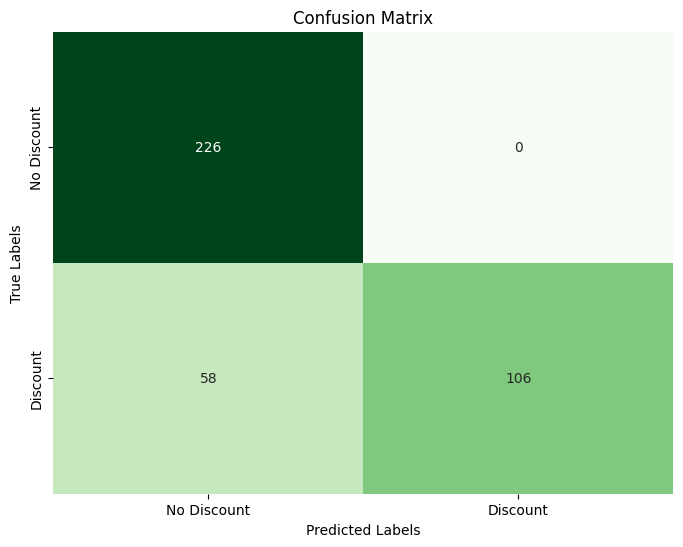

In [317]:
cm = confusion_matrix(Y_test, Y_test_pred)

print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['No Discount', 'Discount'], yticklabels=['No Discount', 'Discount'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Feature Importance Plot

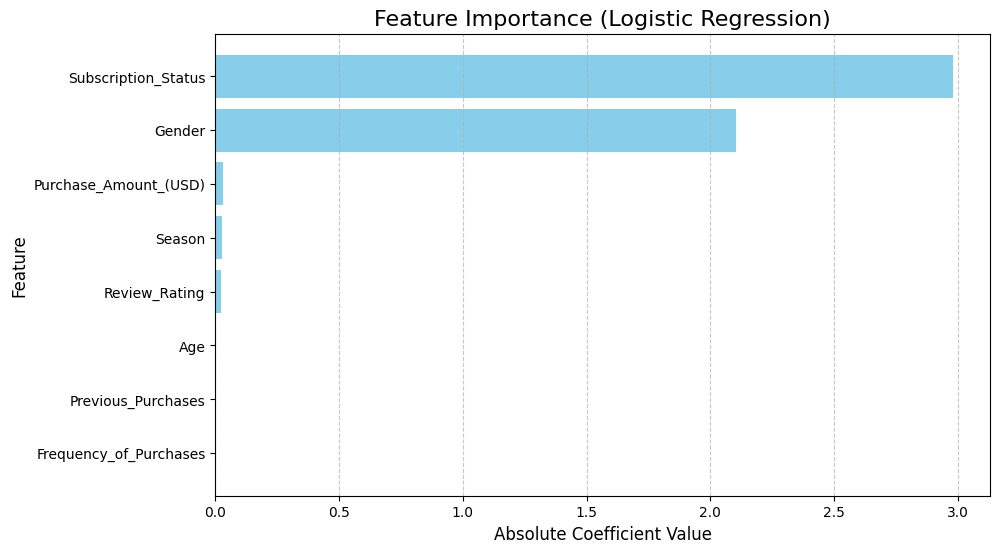

In [318]:
feature_names = X.columns
coefficients = final_model.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(coefficients)
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.title('Feature Importance (Logistic Regression)', fontsize=16)
plt.xlabel('Absolute Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()


In [319]:
feature_names = ['Age', 'Gender', 'Purchase_Amount_(USD)', 'Review_Rating', 'Season', 'Frequency_of_Purchases', 'Subscription_Status', 'Previous_Purchases']

def get_user_input():
    print("Provide the following details to predict if a discount will be applied:")
    inputs = []
    inputs.append(int(input("Age (e.g., 25): ")))
    inputs.append(int(input("Gender (0=Male, 1=Female): ")))
    inputs.append(float(input("Purchase Amount (USD) (e.g., 100.00): "))) 
    inputs.append(float(input("Review Rating (e.g., 4.2): ")))
    inputs.append(int(input("Season (Encoded, e.g., 0=Winter, 1=Spring, 2=Summer, 3=Fall): ")))
    inputs.append(int(input("Frequency of Purchases (Encoded, e.g., 0=Every 3 Months,	1=Annually, 2=Quarterly, 3=Monthly, 4=Bi-Weekly, 5=Fortnightly, 6=Weekly): ")))  # Add Frequency of Purchases
    inputs.append(int(input("Subscription Status (0=No, 1=Yes): "))) 
    inputs.append(int(input("Previous Purchases (e.g., 10): ")))
    return np.array(inputs).reshape(1, -1)

def predict_discount():
    user_data = get_user_input()

    prediction = final_model.predict(user_data)

    if prediction[0] == 1:
        print("\nPrediction: Discount will be applied!")
    else:
        print("\nPrediction: Discount will NOT be applied.")

if __name__ == "__main__":
    print("Welcome to the Discount Prediction System!")
    predict_discount()


Welcome to the Discount Prediction System!
Provide the following details to predict if a discount will be applied:
Age (e.g., 25): 23
Gender (0=Male, 1=Female): 0
Purchase Amount (USD) (e.g., 100.00): 1200
Review Rating (e.g., 4.2): 5
Season (Encoded, e.g., 0=Winter, 1=Spring, 2=Summer, 3=Fall): 2
Frequency of Purchases (Encoded, e.g., 0=Every 3 Months,	1=Annually, 2=Quarterly, 3=Monthly, 4=Bi-Weekly, 5=Fortnightly, 6=Weekly): 4
Subscription Status (0=No, 1=Yes): 1
Previous Purchases (e.g., 10): 10

Prediction: Discount will NOT be applied.
